# Demo 3: Unsupervised Clustering
The hierarchy of the h-NNE is inspired by the FINCH clustering (https://github.com/ssarfraz/FINCH-Clustering). This means that during the generation of the hierarchy a collection of partitions of the dataset is generated. This set of partitions can useful when one is dealing with unlabeled data. Using different levels of the hierarchy, one can identify clusters which align with the h-NNE projection structure. We already presented the functionality in the demo 1 notebook. Here we look at a more realistic scenarion with a larger dataset containing no labels. The dataset we use is a list of 3 million word embeddings of dimension 300 based on the Google news dataset. WARNING: To run this code be sure to use a server with at least 64GB of RAM.

In [1]:
from gensim import models
import numpy as np
import matplotlib.pyplot as plt

from hnne import HNNE

## Download and load the Google news dataset
3M word embeddings of dimension 300. The data can be downloaded from this website: https://code.google.com/archive/p/word2vec. The file needed is 'GoogleNews-vectors-negative300.bin.gz', there is a link to it under the section 'Pre-trained word and phrase vectors'. Once the data is downloaded, one only needs to provide the correct path to 'GoogleNews-vectors-negative300.bin.gz' to the 'load_google_news' function.

In [2]:
def load_google_news(data_path):
    return models.KeyedVectors.load_word2vec_format(
        data_path,
        binary=True
    ).vectors

In [3]:
data_path = './GoogleNews-vectors-negative300.bin.gz'
data = load_google_news(data_path)

In [4]:
data.shape

(3000000, 300)

## Project to 2 dimensions with h-NNE

In [5]:
%%time
hnne = HNNE()
projection = hnne.fit_transform(data, verbose=True)

Building h-NNE hierarchy using FINCH...
Using PyNNDescent to compute 1st-neighbours at this step ...
Mon Mar 14 22:27:14 2022 Building RP forest with 32 trees


/home/mkoulakis/.pyenv/versions/3.7.10/envs/pytorch-3.7/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Mon Mar 14 22:28:48 2022 NN descent for 22 iterations
	 1  /  22
	 2  /  22
	 3  /  22
	 4  /  22
	 5  /  22
	Stopping threshold met -- exiting after 5 iterations
Step PyNNDescent done ...
Level 0: 299588 clusters
Using PyNNDescent to compute 1st-neighbours at this step ...
Mon Mar 14 22:29:45 2022 Building RP forest with 28 trees
Mon Mar 14 22:29:51 2022 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	 4  /  18
	 5  /  18
	Stopping threshold met -- exiting after 5 iterations
Step PyNNDescent done ...
Level 1: 28588 clusters
Level 2: 4456 clusters
Level 3: 834 clusters
Level 4: 164 clusters
Level 5: 38 clusters
Level 6: 8 clusters
Level 7: 2 clusters
Removing 1 levels from the top to start with a levelof size at least 3.
Projecting to 2 dimensions...
[299588, 28588, 4456, 834, 164, 38, 8]
Using ann to approximate 1-nns of the projected points...
Mon Mar 14 22:32:12 2022 Building RP forest with 28 trees
Mon Mar 14 22:32:13 2022 NN descent for 18 iterations
	 1  /  18
	 2 

## Create plots with colors based on the first four partitions generated by h-NNE

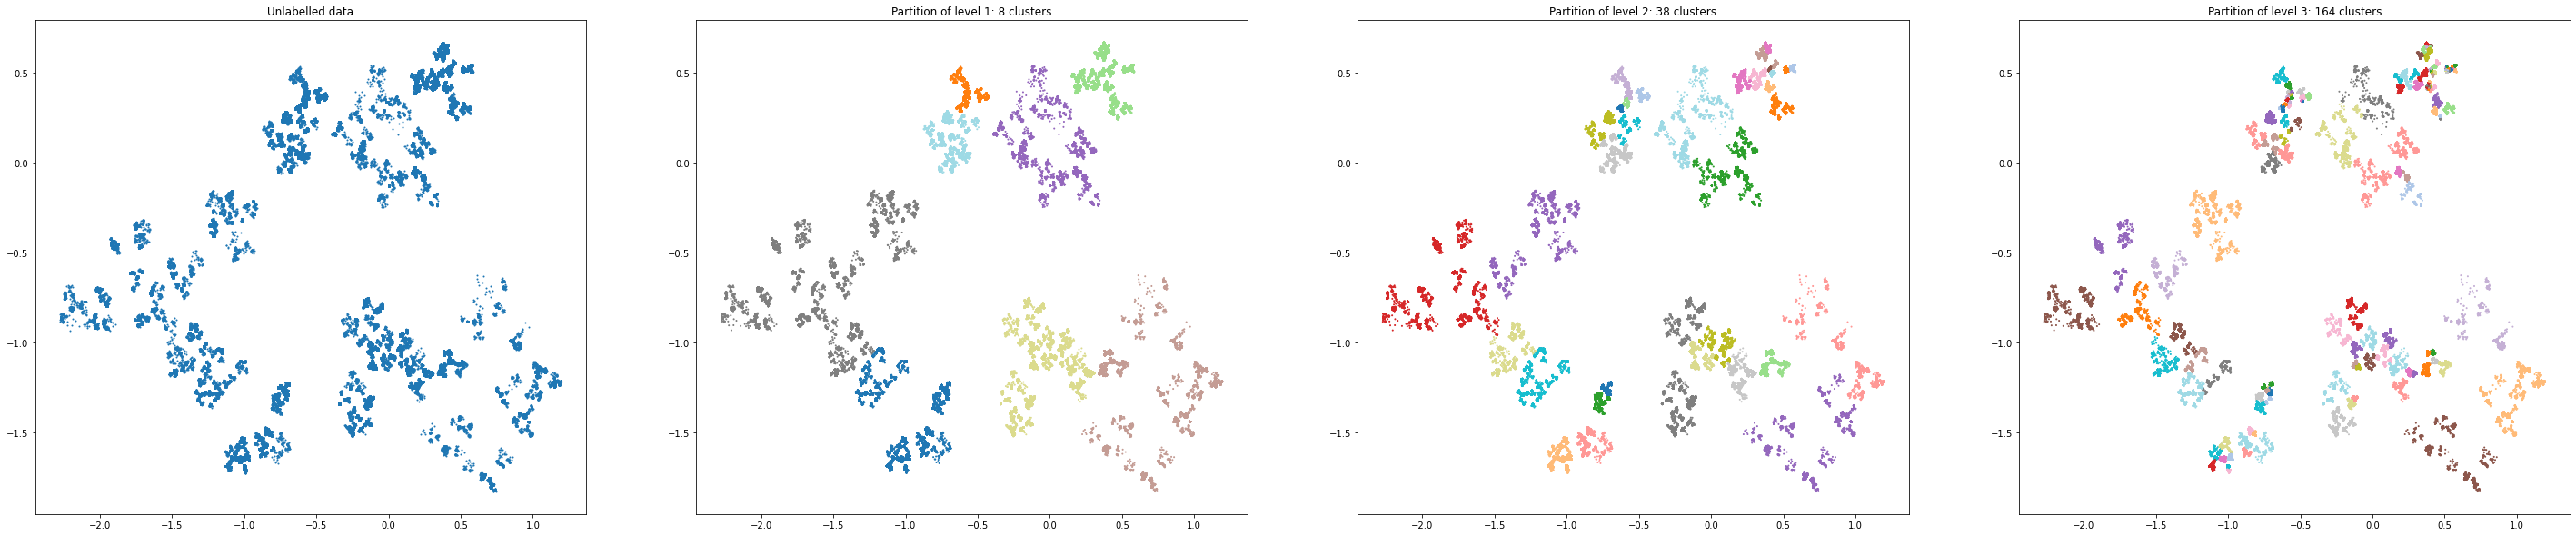

In [6]:
partitions = hnne.hierarchy_parameters.partitions
partition_sizes = hnne.hierarchy_parameters.partition_sizes
number_of_levels = partitions.shape[1]

_, ax = plt.subplots(1, 4, figsize=(10*(4 + 1), 10))

ax[0].set_title('Unlabelled data')
ax[0].scatter(*projection.T, s=1)

for i in range(1, 4):
    partition_idx = number_of_levels - i
    ax[i].set_title(f'Partition of level {i}: {partition_sizes[partition_idx]} clusters')
    ax[i].scatter(*projection.T, s=1, c=partitions[:, partition_idx], cmap='tab20')
plt.show()

## Focus on a specific cluster of the second partition generated in the hierarchy

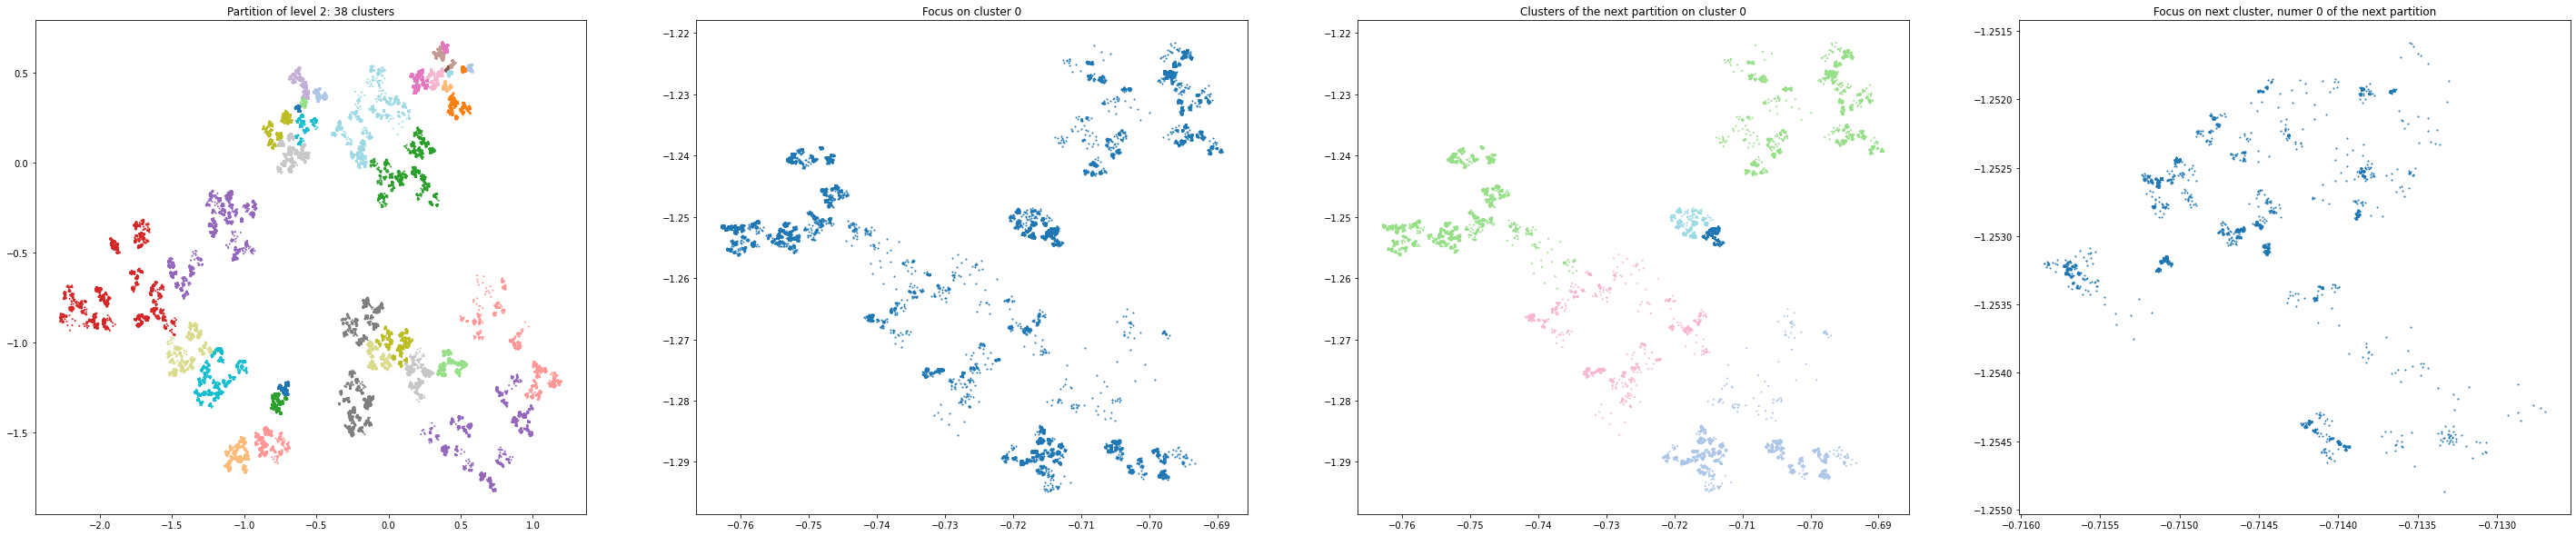

In [7]:
partitions = hnne.hierarchy_parameters.partitions
partition_sizes = hnne.hierarchy_parameters.partition_sizes
number_of_levels = partitions.shape[1]

_, ax = plt.subplots(1, 4, figsize=(10*(4 + 1), 10))

selected_cluster = 0
partition = partitions[:, -2]
cmap_name = 'tab20'
cmap = plt.cm.get_cmap(cmap_name)
cluster_color = cmap.colors[selected_cluster]

next_partition = hnne.hierarchy_parameters.partitions[:, -3]
next_selected_cluster = next_partition[partition == selected_cluster][0]
next_cluster_color = cmap.colors[next_selected_cluster]

ax[0].set_title(f'Partition of level 2: {partition_sizes[-2]} clusters')
ax[0].scatter(*projection.T, s=1, c=partition, cmap=cmap_name)

ax[1].set_title(f'Focus on cluster {selected_cluster}')
ax[1].scatter(*projection[partition == selected_cluster].T, s=1, color=cluster_color, cmap=cmap_name)

ax[2].set_title(f'Clusters of the next partition on cluster {selected_cluster}')
ax[2].scatter(*projection[partition == selected_cluster].T, s=1, c=next_partition[partition == selected_cluster], cmap=cmap_name)

ax[3].set_title(f'Focus on next cluster, numer {selected_cluster} of the next partition')
ax[3].scatter(*projection[next_partition == next_selected_cluster].T, s=1, color=next_cluster_color, cmap=cmap_name)

plt.show()